In [2]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading in data, input your own file directory

#original data 
year_chosen = 2022
df_epp = pd.read_excel("../Data/SRC2022/Expenditures Per Pupil.xlsx")
df_nxp = pd.read_excel("../Data/SRC2022/Inexperienced Teachers and Principals.xlsx")
df_ocert = pd.read_excel("../Data/SRC2022/Teachers Teaching Out of Certification.xlsx")

#High School Data
#Absenteeism Rates, High School
        #dfab_HS = pd.read_excel("../Data/SRC2022/ACC HS Chronic Absenteeism.xlsx")
#Graduation Rate, High School 
dfgradr_HS = pd.read_excel("../Data/SRC2022/ACC HS Graduation Rate.xlsx")
#Core Subject Performance Rates, High School 
dfCSPR_HS = pd.read_excel("../Data/SRC2022/ACC HS Core and Weighted Performance.xlsx")
#participation Rate
    #dfPR_HS = pd.read_excel("../Data/SRC2022/ACC HS Participation Rate.xlsx")



In [4]:
#Elementary and Middle School Data 
#Participation Rates, Elementary and Middle
            #dfPR_EM = pd.read_excel("../Data/SRC2022/ACC EM Participation Rate.xlsx")
#Core Subject Performance Rates, Elementary and Middle 
dfCSPR_EM = pd.read_excel("../Data/SRC2022/ACC EM Core and Weighted Performance.xlsx")


#Staff Data
#post secondary enrollment, high school
    #dfPSE_HS = pd.read_excel("../Data/SRC2022/Postsecondary Enrollment.xlsx")

In [5]:
dfCSPR_EM.head(5)

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,CORE_COHORT,CORE_INDEX,CORE_LEVEL,WEIGHTED_COHORT,WEIGHTED_INDEX,WGT_LEVEL,OVERRIDE_WEIGHTED,OVERRIDE_CORE
0,800000055729,10100010000,ALBANY CITY SD,2022,ELA,All Students,3029,90.5,s,3318,82.6,s,NaN,NaN
1,800000055729,10100010000,ALBANY CITY SD,2022,Math,All Students,2819,67,s,3331,56.7,s,NaN,NaN
2,800000055729,10100010000,ALBANY CITY SD,2022,Science,All Students,938,143.9,s,994,135.8,s,NaN,NaN
3,800000055729,10100010000,ALBANY CITY SD,2022,Combined,All Students,6786,88.1,1,7643,78.2,1,NaN,NaN
4,800000055729,10100010000,ALBANY CITY SD,2022,ELA,Students with Disabilities,562,40.7,s,645,35.5,s,NaN,NaN


In [7]:
def trimmer(df: pd.DataFrame, *column_names, year: int=year_chosen, year_col_name: str="YEAR")->pd.DataFrame:
    """
    Keeps only the columns specified, only the rows whose year agrees with the year argument, 
    and if there is a SUBGROUP column then it keeps only rows with the subgroup classification 
    of "All Students". 
    This is NOT an in-place method. 
    """
    # Trimming Rows
    if year_col_name in df.columns:
        df = df.loc[df[year_col_name]==year]
    if "SUBGROUP_NAME" in df.columns:
        df = df.loc[df["SUBGROUP_NAME"]=="All Students"] #<-----This drops all rows that do not have "All Students"as the "SUBGROUP" column entry.
    if "SUBJECT" in df.columns:
        df = df.loc[df["SUBJECT"]=="Combined"]
    # Trimming Columns
    return df[list(column_names)]

In [12]:
# Trimming data to variables I believe I only need

#original data
df_epp_t = trimmer(df_epp,'ENTITY_NAME', 'ENTITY_CD', 'PER_FED_STATE_LOCAL_EXP')
df_nxp_t = trimmer(df_nxp,'ENTITY_CD', 'PER_TEACH_INEXP')
df_ocert_t = trimmer(df_ocert,'ENTITY_CD', "PER_OUT_CERT")


#high school data
#dfab_HS = trimmer(dfab_HS, 'INSTITUTION_ID', 'ENTITY_CD', "ABSENT_RATE", "DATA_REP_FLAG", year=2022)
dfgradr_HS = trimmer(dfgradr_HS.loc[dfgradr_HS.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', 'GRAD_RATE', year=2022)
dfCSPR_HS = trimmer(dfCSPR_HS.loc[dfCSPR_HS.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', "CORE_INDEX", "SUBJECT", year=2022)
#dfPR_HS = trimmer(dfPR_HS, 'INSTITUTION_ID', 'ENTITY_CD', "SUBJECT", "RATE", year=2022)


#df_y = trimmer(df_y.loc[df_y.ENTITY_CD%10000 != 0], 'ENTITY_CD', 'ENTITY_NAME', 'SUBJECT', year=2022)

#elementary and middle school data
#dfPR_EM = trimmer(dfPR_EM, 'INSTITUTION_ID', 'ENTITY_CD', "RATE","MET_95_PERCENT", year=2022)
dfCSPR_EM = trimmer(dfCSPR_EM.loc[dfCSPR_EM.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', "SUBJECT", year=2022)

#post secondary enrollment
#dfPSE_HS = trimmer(dfPSE_HS, 'INSTITUTION_ID', 'ENTITY_CD', "TOTAL_GRAD_COUNT", "PER_NYS_PUB_4_YR", 
                   #"PER_NYS_PVT_4_YR", "PER_NYS_PUB_2_YR", "PER_NYS_PVT_2_YR", year=2022)

#Checking
#print(dfab_HS.head())
print(dfgradr_HS.head())
print(dfCSPR_HS.head())
#print(dfPR_HS.head())
#print(dfPR_EM.head())
print(dfCSPR_EM.head())
print(df_epp_t.head())
print(df_nxp_t.head())
print(df_ocert_t.head())

#print(dfPSE_HS.head())


       INSTITUTION_ID    ENTITY_CD GRAD_RATE
66       800000055743  10100010034      78.6
79       800000055743  10100010034      81.8
81       800000055743  10100010034      76.6
82       800000055743  10100010034        79
80133    800000055406  10601060008      94.6
     INSTITUTION_ID    ENTITY_CD CORE_INDEX   SUBJECT
72     800000055743  10100010034      155.4  Combined
104    800000059776  10100860907      127.1  Combined
149    800000055320  10701030001      128.9  Combined
224    800000068133  10100860960      108.6  Combined
304    800000055479  10201040001        153  Combined
     INSTITUTION_ID    ENTITY_CD CORE_INDEX   SUBJECT
43     800000055730  10100010014      165.9  Combined
79     800000055731  10100010016       89.2  Combined
115    800000055732  10100010018       61.9  Combined
151    800000055733  10100010019      125.1  Combined
191    800000055736  10100010023      120.1  Combined
                       ENTITY_NAME    ENTITY_CD  PER_FED_STATE_LOCAL_EXP
6        

In [9]:
#exploring data
#looking at columns



#looking at value counts


#print(dfab_HS["ABSENT_RATE"].value_counts())

#print(dfgradr_HS["GRAD_RATE"].value_counts())

#print(dfCSPR_HS["CORE_INDEX"].value_counts())

#print(dfPR_HS["RATE"].value_counts())

#print(dfPR_EM["RATE"].value_counts())

#print(dfCSPR_EM["ENTITY_NAME"].value_counts())

print(dfCSPR_EM.loc[dfCSPR_EM["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
print(dfCSPR_HS.loc[dfCSPR_HS["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
# Not sure why some schools are repeating twice


print(dfCSPR_EM.columns)
print(dfCSPR_HS.columns)

10100010014     1
353100010060    1
400601060006    1
400601060008    1
400701060002    1
               ..
310400010012    1
310400010037    1
310400010038    1
310400010057    1
680801040002    1
Name: ENTITY_CD, Length: 3865, dtype: int64
10100010034     1
342900011313    1
342700861147    1
342700861054    1
342700861052    1
               ..
310200011459    1
310200011449    1
310200011439    1
310200011438    1
680801040001    1
Name: ENTITY_CD, Length: 1295, dtype: int64
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')


In [10]:
#concatenate
dfCSPR_EM["SCHOOL_TYPE"] = "EM"
dfCSPR_HS["SCHOOL_TYPE"] = "HS"

print(dfCSPR_EM.columns)

dfcomb = pd.concat([dfCSPR_EM, dfCSPR_HS])
print(dfcomb.sample(20))

Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT', 'SCHOOL_TYPE'], dtype='object')
        INSTITUTION_ID     ENTITY_CD CORE_INDEX   SUBJECT SCHOOL_TYPE
139511    800000037042  580512030004      101.1  Combined          EM
109243    800000040934  421201040002      134.4  Combined          EM
65499     800000046275  321000010003        105  Combined          EM
84503     800000063971  332100860949      113.5  Combined          EM
50093     800000084244  353100861083      120.7  Combined          HS
44457     800000049328  280224020003      173.9  Combined          EM
56839     800000047159  310500010161       86.7  Combined          EM
41577     800000049563  280210030005      154.9  Combined          EM
72307     800000045560  331300010287       83.3  Combined          EM
15337     800000053353  131500010007          s  Combined          EM
41293     800000049612  280209030003      108.1  Combined          EM
78319     800000043472  331700011590      147.4  Combined        

<Axes: xlabel='CORE_INDEX', ylabel='Count'>

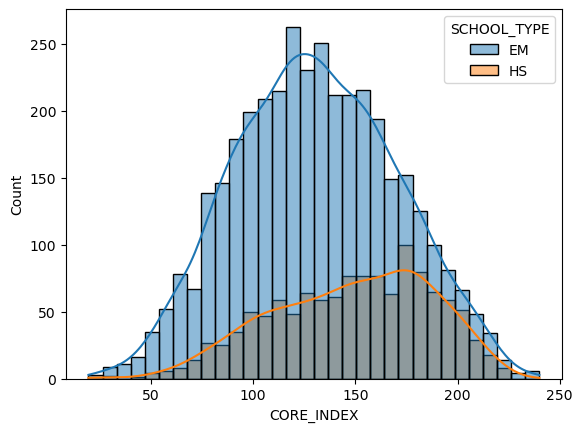

In [11]:
# dfcomb.info()
dfcomb["CORE_INDEX"] = pd.to_numeric(dfcomb["CORE_INDEX"], errors = "coerce")
dfcomb = dfcomb.dropna()
# dfcomb.info()
sns.histplot(data=dfcomb, x="CORE_INDEX", hue = "SCHOOL_TYPE", kde = True)



In [13]:
#merging

from functools import reduce

# Data Frames List
data_frames_to_merge = [df_epp_t, df_nxp_t, df_ocert_t, dfcomb]

# Merging Function
def merge_function(left_df, right_df):
    return pd.merge(left_df, right_df, on='ENTITY_CD',
                                            how='inner'
                                            )

# Merge 'em! 
df = reduce(merge_function, data_frames_to_merge)


In [20]:
df.sample(50)
#df.shape

,ENTITY_NAME,ENTITY_CD,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,INSTITUTION_ID,CORE_INDEX,SUBJECT,SCHOOL_TYPE
90,WHITESVILLE CENTRAL SCHOOL,22101040001,20491.0,50.0,8.0,800000055157,117.6,Combined,EM
2660,UTICA ACADEMY OF SCIENCE CS,412300861058,10337.0,34.0,26.0,800000075839,163.5,Combined,HS
3843,EARL L VANDERMEULEN HIGH SCHOOL,580206020003,28748.0,14.0,0.0,800000037641,205.2,Combined,HS
2771,SUFFERN MIDDLE SCHOOL,500401060011,23128.0,5.0,1.0,800000039141,144.1,Combined,EM
3612,"QUEENS COLLEGE SCHOOL-MATH, SCI, TEC",342500011499,14191.0,35.0,9.0,800000042119,193.9,Combined,EM
727,JAMES A DEVER SCHOOL,280213020001,22209.0,12.0,0.0,800000049533,162.4,Combined,EM
1521,KIPP ACADEMY CHARTER SCHOOL,320700860820,21325.0,47.0,56.0,800000034168,177.2,Combined,HS
1426,JONAS BRONCK ACADEMY,321000010228,18965.0,38.0,14.0,800000059083,148.5,Combined,EM
688,DURHAMVILLE SCHOOL,251400010002,15005.0,0.0,5.0,800000050899,111.5,Combined,EM
4288,ADDISON MIDDLE/HIGH SCHOOL,570101040002,14604.0,10.0,0.0,800000038070,105.2,Combined,EM


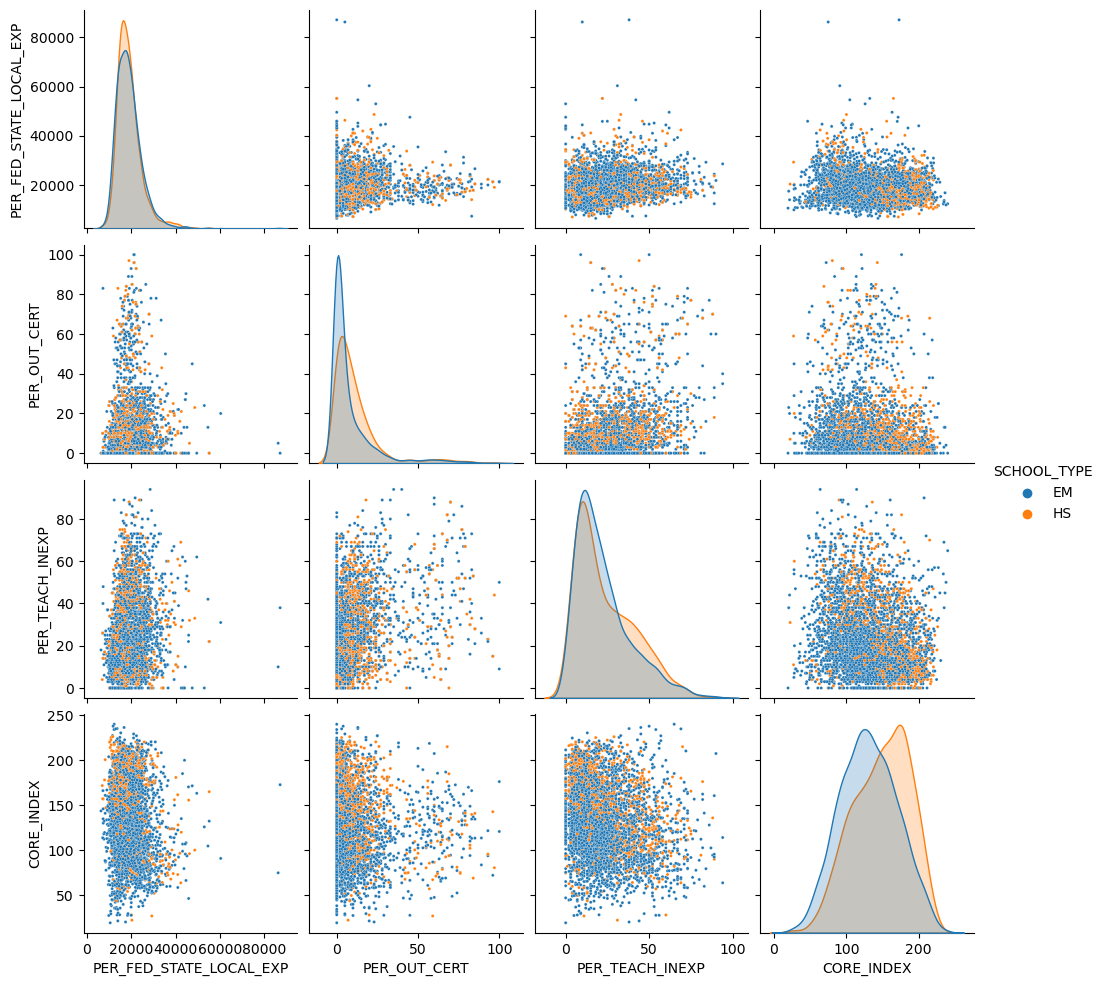

In [25]:
#pairplot

col_palette = {
    "EM": ("blue", .5), 
    "HS": ("orange", 1)
}
sns.pairplot(df, 
             x_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP", "CORE_INDEX"], 
             y_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP", "CORE_INDEX"], 
             hue="SCHOOL_TYPE", 
             # palette=col_palette, 
             plot_kws={"s": 5}, 
             diag_kws={"common_norm": False}
            #  kind="hex", 
             )